4-5장
11/17

# 4장. 다양한 분류 알고리즘
- 럭키백에 7개의 생선을 넣어서 판매할건데, 이 7개의 생선 확률만 알려주는 것이 마케팅 (ex) 도미일 확률 72%, 빙어일 확률 16%)
- k-최근접 이웃 분류기로 샘플 x 주위에 삼각형, 사각형, 원 등의 개수가 각각 몇 개인지 확인하여 이것을 확률로 표시하자!

## 4-1. 로지스틱 회귀

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
# df에서 여러 열 선택하면 새로운 df로 반환. to_numpy(넘파이) 배열로 바꿈
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [ ]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
# Species 열을 타깃으로 만들기
fish_target = fish['Species'].to_numpy()

In [ ]:
# 훈련 세트와 테스트 세트로 나누기
# 훈련 세트의 통계 값으로 테스트 세트를 변환해야함
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [ ]:
# StandardScaler 클래스를 사용해 훈련 세트와 테스트 세트를 표준화 전처리
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input) # 훈련 세트의 평균과 표준편차를 계산 (이 줄 수행 안 하면 밑에 줄 오류남)
train_scaled = ss.transform(train_input) # 훈련 세트를 표준화
test_scaled = ss.transform(test_input) # 훈련 세트 기준으로 테스트 세트를 표준화

+) 표준화 하는 이유: 데이터의 특성값들이 서로 다른 범위를 가지는 경우 ex) 키: 150 ~ 200, 몸무게: 50 ~ 100, 나이: 20~80
- 두 점 사이 거리 계산할 때, 키 값이 다른 특성보다 거리에 더 큰 영향을 주게 됨.
- 각 특성의 단위가 제거되므로, 특성 간의 상대적 크기 차이를 없애고 균등한 영향을 미치게 됨.
- 모든 특성이 평균 0, 표준편차 1 가짐.

k-최근접 이웃 분류기의 확률 예측

In [ ]:
# 훈련 세트로 모델을 훈련한 다음 훈련 세트와 테스트 세트의 점수 확인
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target) # fit(X, y) 훈련 데이터로 모델 학습 (표준화된 입력 데이터, 정답값=레이블)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


다중 분류: 타깃 데이터에 2개 이상의 클래스가 포함된 문제
- 앞장에서는 1과 0을 지정하여 타깃 데이터를 만들었는데, 사이킷런에서는 편리하게도 문자열로 된 타깃값을 그대로 사용

In [ ]:
# 앞의 pd.unique(fish['Species'])와 순서가 다름 (밑에 건 알파벳 순)
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
# 테스트 세트에 있는 처음 5개 샘플의 타깃값을 예측해보기
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
# 윗윗줄의 kn.classes와 같은 순서로 클래스별 확률값 반환
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4)) # 다섯 번째 자리에서 반올림해서 네 번째 자리까지 표기함.

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
# 네 번째 샘플 [0. 0. 0.6667 0. 0.3333 0. 0.  ]에 대해서 실제로 최근접 이웃의 클래스 확인해보자
# +) kneighbor() 메서드의 입력은 2차원 배열. 이를 위해 넘파이 슬라이싱 연산자 사용.
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])
print(kn.kneighbors(test_scaled[3:4]))

[['Roach' 'Perch' 'Perch']]
(array([[0.20774583, 0.24862983, 0.33682411]]), array([[104, 115, 106]]))


- 이 샘플의 이웃은 다섯 번째 클래스인 'Roach' 1개 + 세 번째 클래스인 'Perch' 2개
- distances: 3개의 값은 각 이웃과의 거리
- indexes: 3개의 값은 훈련 데이터셋 내에서 가장 가까운 3개의 샘플의 인덱스 = 104, 115, 106번 샘플이 가장 가까운 이웃

로지스틱 회귀
- 이름은 회귀이지만 분류 모델
- 선형 회귀와 동일하게 선형 방정식을 학습함.
- 1) z = a x weight + b x length ... + f (a,b, ... f는 가중치)
- 2) 여기서 z를 0~1 사이로 변환시켜야함 = 시그모이드 함수
- 3) 훈련 데이터를 사용하여 가중치를 조정 = 로그 손실 함수를 최소화하려고 시도함.
- 모델이 초기 가중치를 무작위로 설정 후, 손실 함수를 최소화하는 방향으로 가중치 조절함!
- 손실 함수를 최소화하기 위하여 경사하강법과 같은 최적화 알고리즘이 사용됨.
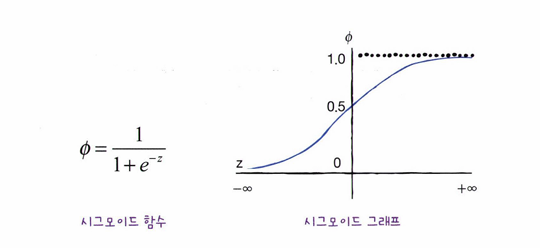

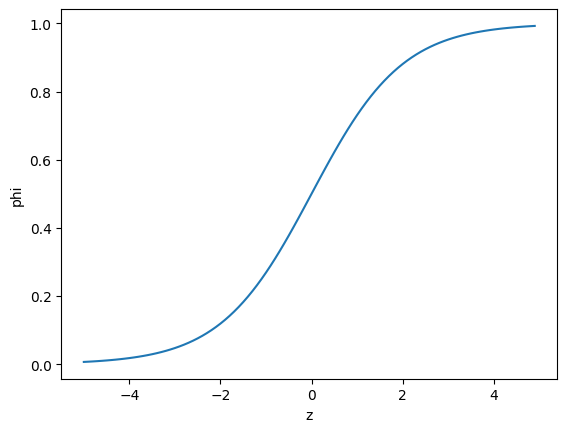

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1) # -5와 5 사이에 0.1 간격으로 배열 z를 만듦
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

로지스틱 회귀로 이진 분류 수행하기
- 시그모이드 함수의 출력이 0.5보다 크면 양성, 0.5이하면 음성 클래스지스틱 회귀로 이진 분류 수행하기
- 도미냐 빙어냐

In [ ]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [ ]:
print(train_target[:7])

['Bream' 'Pike' 'Smelt' 'Perch' 'Parkki' 'Roach' 'Perch']


In [ ]:
print(train_scaled[:7])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]
 [-0.9127463  -0.96490079 -0.95281644 -0.88017186 -0.99153566]
 [-0.79734143 -0.70251203 -0.76172762 -0.78282455 -0.54453018]]


In [ ]:
# 도미와 빙어의 행만 골라서 True로 바꾸고 그 행만 가져오기
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') # True, False 반환
train_bream_smelt = train_scaled[bream_smelt_indexes] # True인것만 가져옴
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt) # fit(훈련 데이터, 타겟 데이터)

LogisticRegression()

In [ ]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
print(target_bream_smelt[:5]) # 맞는지 확인해봄 = 내가 추가한 코드

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
print(lr.predict_proba(train_bream_smelt[:5])) # 도미(0)일 확률, 빙어(1)일 확률 = 클래스 1에 대한 확률

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [ ]:
print(lr.classes_)

['Bream' 'Smelt']


In [ ]:
print(lr.coef_, lr.intercept_) # 가중치 순서대로 출력 / 편향(b) 출력

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [ ]:
# 가중치를 이용하여 z를 구함 = decision_function
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [ ]:
# 위에서 계산한 z를 시그모이드 함수에 통과시킴 = 확률 구함(0~1값)
# 클래스 1(빙어)에 대한 확률
from scipy.special import expit
print(expit(decisions))

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


로지스틱 회귀로 다중 분류 수행하기
- 위에서는 이진 분류였지만, 7개의 생선을 분류 = 다중 분류
- max_iter = 반복 횟수의 기본값은 100인데 너무 적어서 1000으로 늘림
- 로지스틱 회귀는 릿지 회귀(계수의 제곱, alpha)을 규제함. 규제를 제어하는 매개변수는 C. C는 alpha와 반대로 작을수록 규재가 커짐. 기본값은 1이지만, 규제 완화를 위해 20으로 늘림.

In [ ]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


- (7, 5) 5개의 특성(무게, 크기 등)이므로 열은 5개, 행은 7개
- (7, ) 편향(b)도 7개
--> 클래스마다 z 값을 하나씩 계산해서 7개나 나오는 것!
- 이진 분류 때는 열은 5개, 행은 2개

In [ ]:
# z값 계산
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


소프트 맥스
- 시그모이드 함수(이진 분류)는 하나의 선형 방정식의 출력값을 0 ~ 1 사이로 압축하고, 소프트맥스 함수(다중 클래스 분류)는 여러 개의 선형 방정식의 출력값을 0 ~ 1 사이로 압축하고 전체 합이 1이 되도록 함.
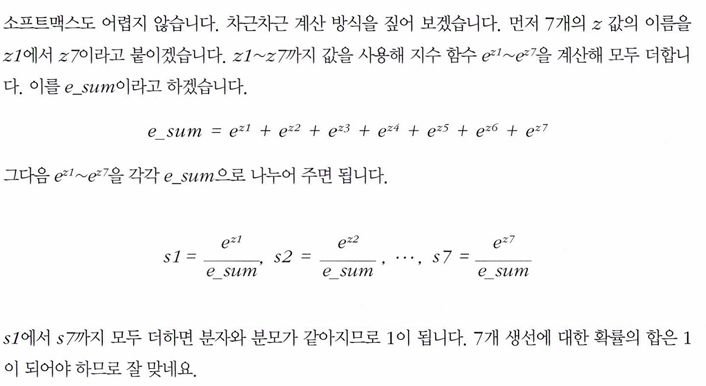

In [ ]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


## 4-2. 확률적 경사 하강법
- 수산물 공급하겠다는 곳이 많아져서 훈련 데이터가 조금씩 여러 번에 걸쳐 전달됨
- 매일 추가되는 새로운 데이터를 활용해 모델을 훈련할 수 있지만, 몇 달이 지나면 모델을 훈련하기 위해 서버를 늘려야함
- 또 다른 방법은 새로운 데이터를 추가할 때 이전 데이터를 버려 훈련 데이터 크기를 일정하게 유지할 수 있지만, 중요한 데이터가 포함돼있다면 큰일
- -> 이전에 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련하자!! = 점진적 학습 (ex) 확률적 경사하강법)

확률적 경사 하강법
- 훈련 세트에서 랜덤하게 하나의 샘플을 골라 경사를 조금 내려가고, 그 다음 훈련세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려감.
- 모든 샘플을 다 사용했는데 다 내려오지 못 했으면 처음부터 다시 시작! 훈련 세트에 모든 샘플을 다시 채워두고 위의 절차를 계속 진행

에포크
- 확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정
- 일반적으로 경사 하강법은 수십, 수백 번 이상 에포크를 수행함

미니배치 경사 하강법
- 위에서는 하나의 샘플을 사용했다면, 여러 개의 샘플을 사용해 경사 하강법 수행

배치 경사 하강법
- 전체 데이터를 사용하기 때문에 안정적일 수 있으나, 컴퓨터 자원 너무 낭비

+) 신경망 알고리즘에서 신경망은 많은 데이터를 사용하기 때문에 확률적 경사 하강법이나 미니배치 경사 하강법을 사용함.

손실 함수
- 값이 작을수록 좋음
- 함수를 연속적으로 만드려면 예측은 0 or 1이지만 확률은 0 ~ 1 사이의 값으로 만들면 됨
- 예측이 0.9(1) 0.3(1) 0.2(0) 0.8(0) 이 있었다면,
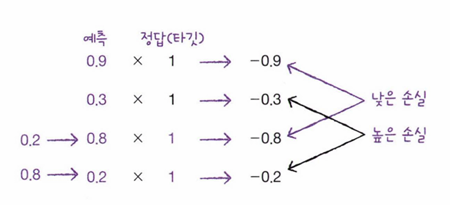

- -> 정답이 0일 경우엔 예측 확률을 곱해도 0이 되므로 정답을 1로 바꾸는 대신 예측값도 그에 맞게 바꿈(1-예측값)


로지스틱 손실 함수(= 이진 크로스엔트로피 손실 함수)
- 타깃 1일 때 손실 = -log(예측 확률)
- 타깃 0일 때 손실 = -log(1-예측 확률)
- -> 이진 분류는 '로지스틱 손실 함수', 다중 분류는 '크로스엔트로피 손실 함수'를 사용
- -> 회귀의 손실 함수로는 3장의 평균 절댓값 오차를 사용


SGDClassifier
- 확률적 경사 하강법

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
# log_loss는 이진 분류 모델을 만든다는 뜻. 도미는 1, 나머지는 모두 0
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42) # 10번 반복하고, 다시 호출하면 그땐 초기화됨.
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


partial_fit
- 훈련 세트와 테스트 세트의 정확도가 낮음 ... 반복 횟수 10번이 부족 (위)
- 다시 호출 = 1 에포크씩 이어서 훈련 (아래)
- 다시 호출 시 이전에 학습한 내용을 유지하면서 새로운 데이터 학습
- 데이터가 너무 크거나, 메모리에 전부 적재할 수 없을 때 유용

- vs fit (= 한 번에 전체 데이터 학습, 다시 호출시 기존 학습 내용이 초기화됨.)

In [ ]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [ ]:
# 과대 적합, 과소 적합 위치를 알아내보자
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [ ]:
# 300번의 에포크 훈련 반복마다 훈련 세트와 테스트 세트의 점수 기록
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

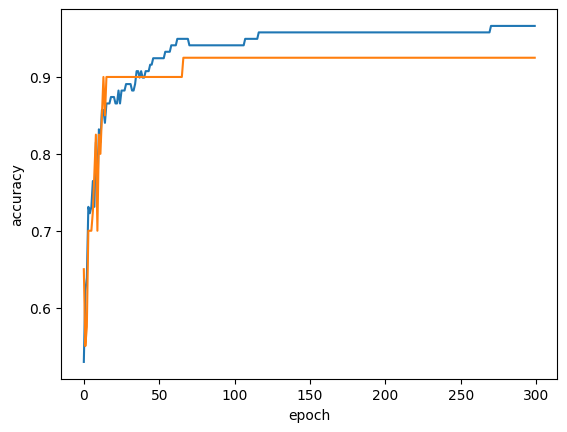

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

- 100번째 이후에는 훈련 세트와 테스트 세트의 점수가 조금씩 벌어지고 있음.
- -> 에포크 100이 적절한 횟수.

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [ ]:
# loss 매개변수의 기본 값은 hinge = 참고만 하기!
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


# 5장. 트리 알고리즘
- 캔에 인쇄된 알코올 도수, 당도, pH값으로 와인 종류를 구별할 수 있는가?
- -> 로지스틱 회귀 모델 적용해보자!

In [ ]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [ ]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [ ]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


- 둘 다 점수가 낮은 걸 보니 과소적합된 것으로 판단
- 규제 매개변수 C의 값을 바꿔보거나 solver 매개변수에서 다른 알고리즘 선택해보기

In [ ]:
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


- 이 숫자가 어떤 의미인지 설명하기 어렵고, 로지스틱 회귀 모델을 이해하기 어렵다

## 5-1. 결정 트리
- 스무 고개처럼 질문을 통해 분류 정확도를 높이는 것
- 레드 와인이 0(왼쪽), 화이트 와인이 1(오른쪽)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


- 훈련 세트 성능은 높지만, 테스트 세트 성능이 낮아서 과대적합된 모델로 판단

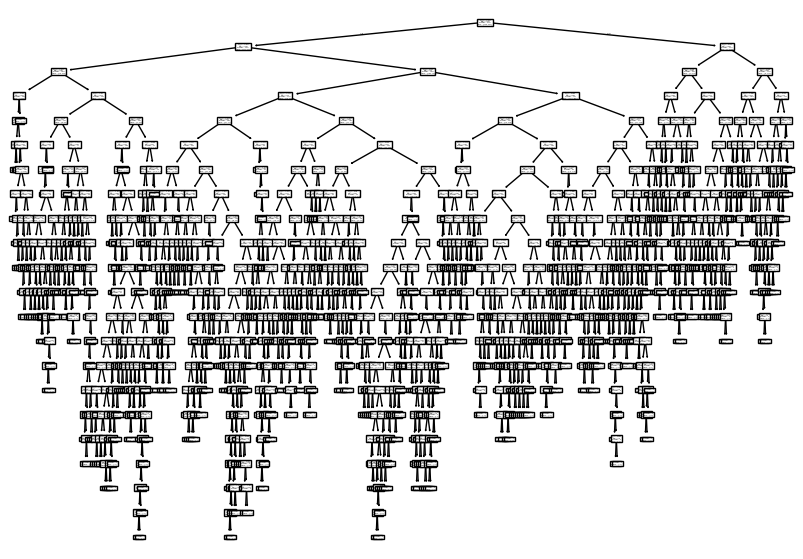

In [ ]:
# 결정트리를 그림으로 표현
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

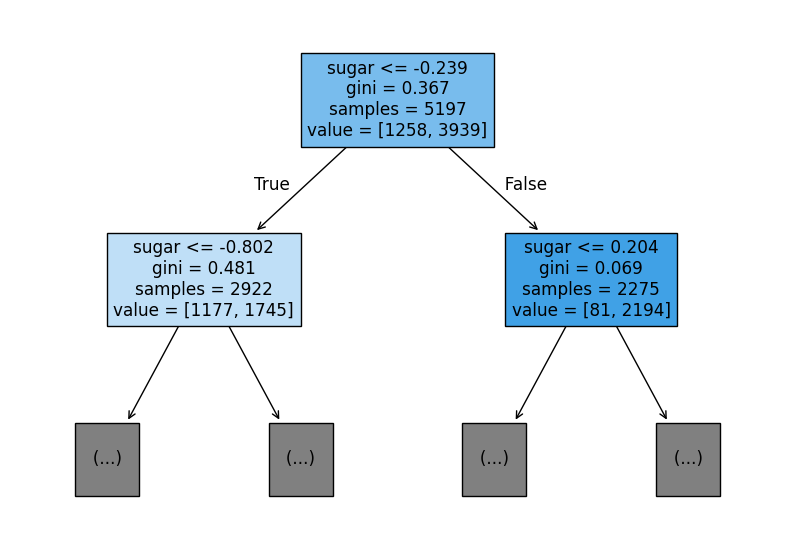

In [ ]:
# 너무 복잡해서 깊이 정해서 보기
# filled=True는 색상이 진할수록 특정 클래스에 대한 확신이 높은 것을 의미(어떤 클래스의 비율이 높아졌다는 것)
# feature_names는 데이터의 컬럼 이름을 표시하기 위한 것
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

- 루트 노드에서 당도가 -0.239보다 낮으면 왼쪽인 레드와인 즉, 음성 클래스로 가고(1258개), 높으면 오른쪽인 화이트와인 즉, 양성 클래스로 감(3939개) 을 뜻하는 게 아님!!!!! XXX
- 일단, 루트 노드에서 -0.0239 당도를 기준으로 왼쪽, 오른쪽으로 나뉘는데 왼쪽이 음성 클래스인 것은 아님. value = []에 집중하면 레드와인(0)은 1258개, 화이트와인(1)은 3939개로 이 정도 비율이면 당도 기준으로 나누는 게 나쁘지 않다 라는 것을 뜻함.
- 최종 결과는 value에서 왼쪽, 오른쪽 중 더 높은 것을 그 클래스로 예측함.
- 위 그림에서 두 자식 노드가 리프노드라면 두 노드 모두 화이트 와인(1)이라고 예측함.

gini
- <지니 불순도>
- 앞에서 어떻게 당도 -0.239를 기준으로 나눴을까?
- 지니 불순도 = 1 - (음성 클래스 비율 + 양성 클래스 비율)

-

- ex) 앞 그림에서 루트 노드는 총 5,197개고 1,258과 3,939로 나뉨
- 지니 불순도 = 1 - ((1258/5197) + (3939/5197)) = 0.367
- 불순도가 0.5면 최악 (확률이 반반), 0이면 굿(=순수 노드)
-
- 부모 노드와 자식 노드의 불순도 차이가 가능한 크도록 트리를 성장시킴.
- 자식 노드의 불순도를 샘플 개수에 비례하여 모두 더하고, 부모 노드의 불순도에서 뺀다.
-
- ex) 왼쪽 노드로 2,922개의 샘플이, 오른쪽 노드로 2,275개의 샘플이 이동함.
- 0.367 - (2922/5197) x 0.481 - (2275/5197) x 0.069 = 0.066
-
- <엔트로피 불순도>
- 결정트리에서 criterion=entropy를 지정하여 엔트로피 불순도를 사용할 수 있음.
- -음성 클래스 비율 X log2(음성 클래스 비율) - 양성 클래스 비율 X log』양성 클래스 비율 = -(1258/5197) X log2(l258 / 5197) - (3939/5197) X log2(3939 / 5197)= 0.798

가지치기
- 자라날 수 있는 트리의 최대 깊이를 지정하는 것

In [ ]:
# 높이를 3으로 지정하기
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


- 훈련 세트의 성능은 낮아졌지만 테스트 세트이 성능은 거의 그대로

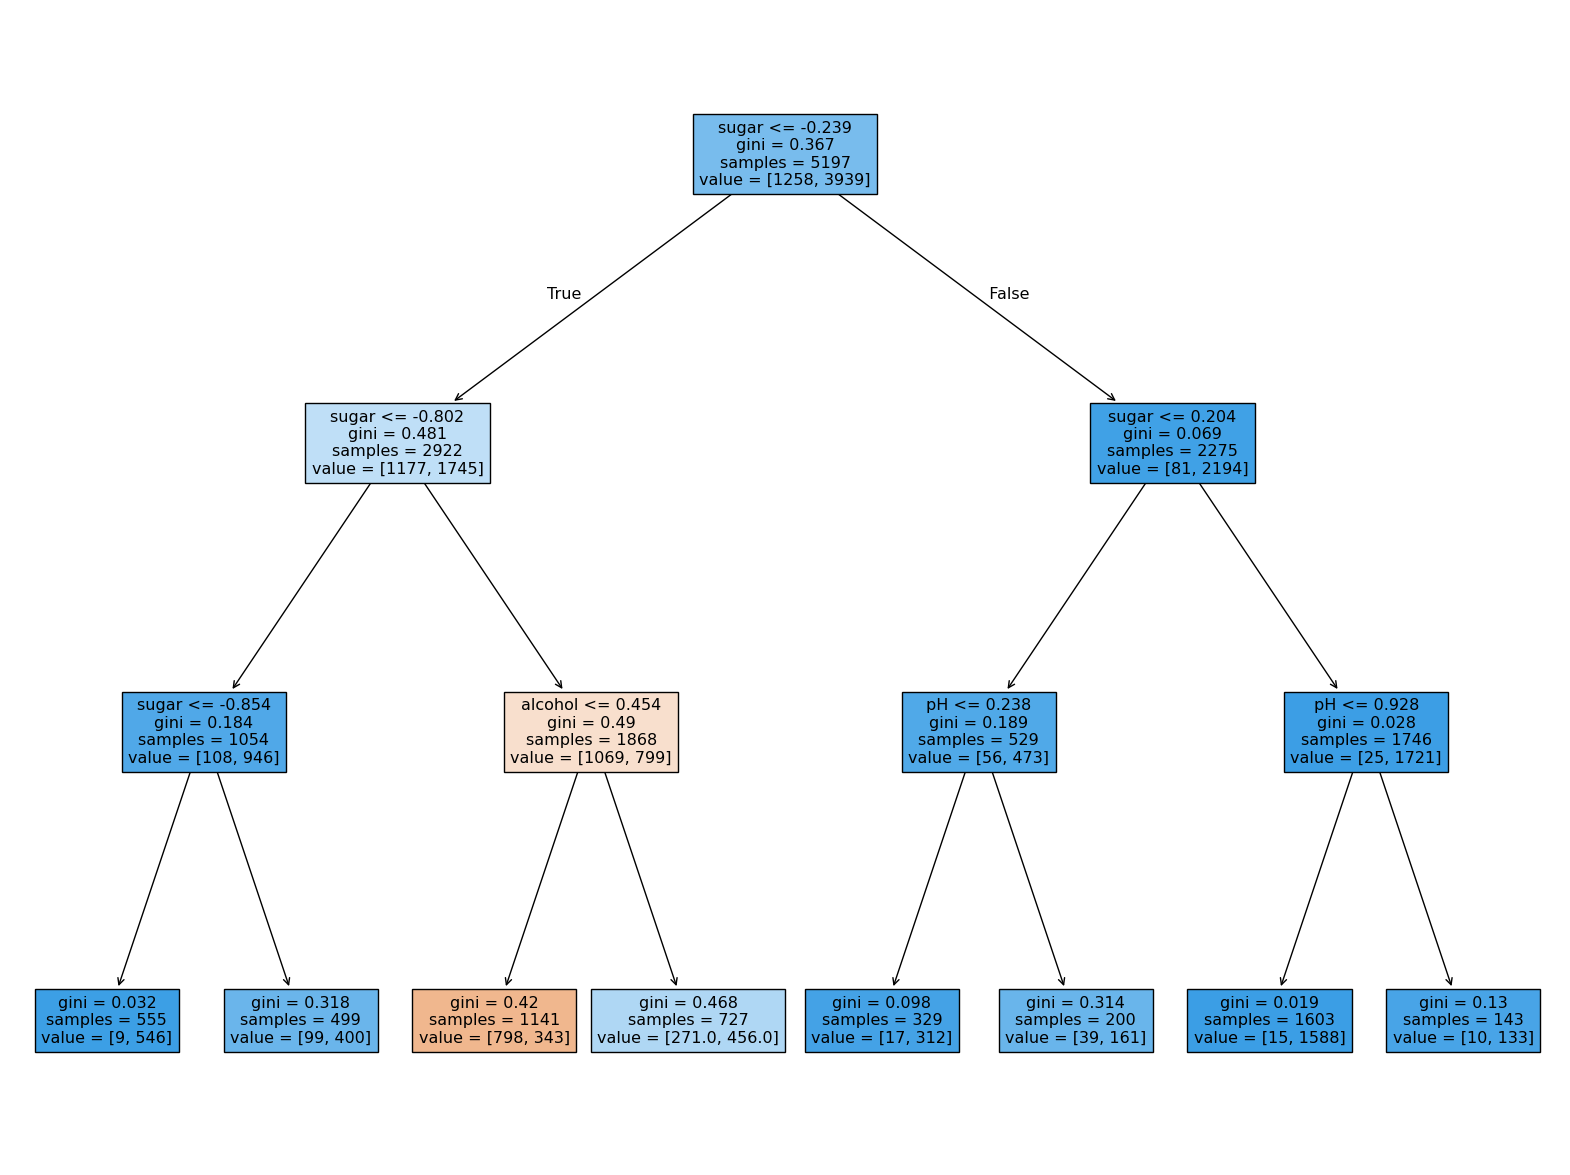

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

- 리프 노드에서 왼쪽에서 세 번째에 있는 노드만 음성 클래스가 더 많아서 이 노드에 도착해야만 레드 와인으로 예측.

In [ ]:
# 위에서 -0.239 등 표준화된 스케일이라서 알아보기 힘듦
# 결정트리모델은 스케일 변환이 필요없기에 다시 처음부터 특성값 그대로 훈련시키기
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


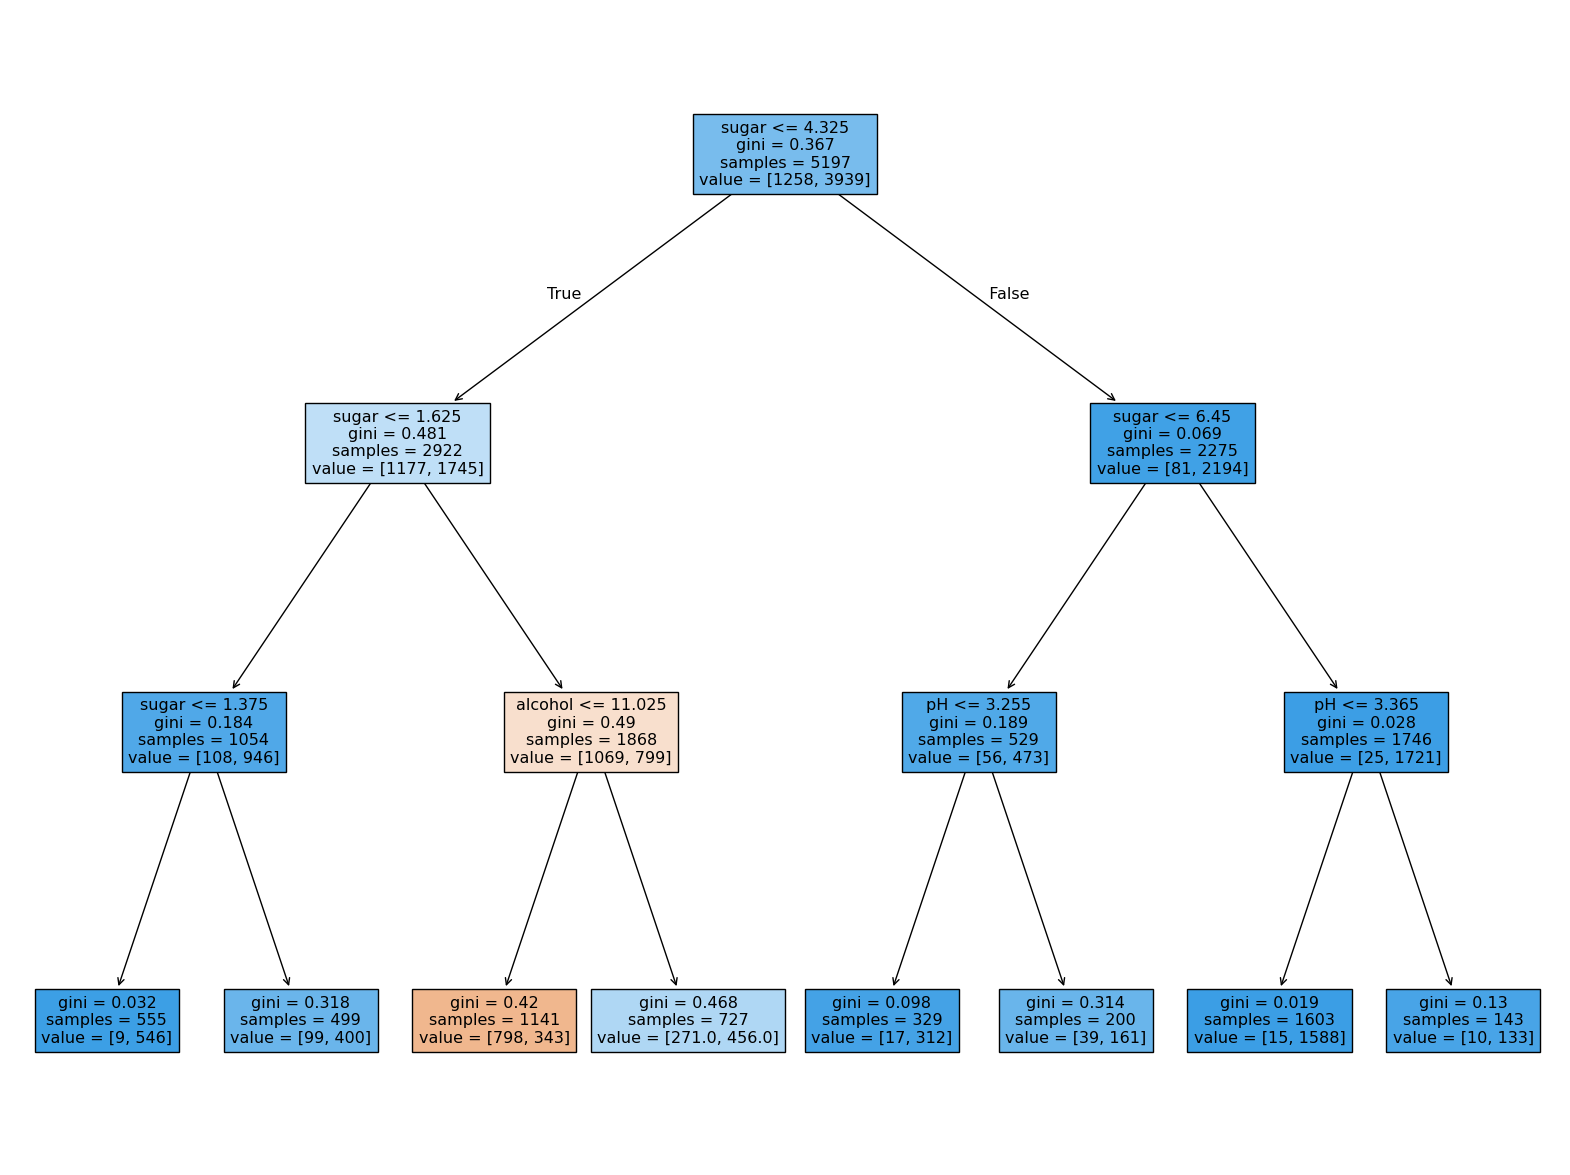

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
# 특성 중요도는 feature_importances_ 속성에 저장돼있음
# 루트 노드와 깊이 1에서 당도 사용했기에 아마 당도일 것
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


순서대로 알코올, 당도, pH임. 당도가 젤 높음.

## 5-2. 교차 검증과 그리드 서치
- 문제를 간단히 하기 위하여 테스트 세트를 사용했는데, 테스트 세트로 일반화 성능을 올바르게 예측하려면 가능한 한 테스트 세트를 사용하지 말아야함.
- 테스트 세트를 사용하지 않고 성능을 측정하는 방법은 훈련 80, 테스트 20이었던 것에서 훈련 20을 떼서 검증 세트로 만듦.
- 훈련 세트에서 모델을 훈련하고 검증 세트로 모델을 평가한다. 이 매개변수를 사용해 훈련+검증 세트를 합쳐 전체 훈련 데이터에서 모델을 다시 훈련함. 그리고 마지막에 테스트 세트에서 최종 점수를 평가한다.

In [ ]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [ ]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [ ]:
# 훈련 세트에서 20 떼서 검증 세트 만들기
# 훈련=sub, 검증=val
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [ ]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [ ]:
# val_input, val_target을 사용해서 모델을 평가하면 됨
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


교차 검증
- 검증 세트를 만드느라 훈련 세트가 너무 줄었음.
- 3-폴드 교차 검증을 통하여 교차 검증 수행
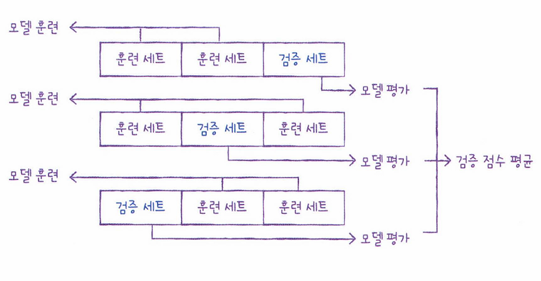

In [ ]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.00955534, 0.00926328, 0.00807261, 0.00791192, 0.0077877 ]), 'score_time': array([0.00108266, 0.0010376 , 0.00100708, 0.00099158, 0.00102377]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


- 훈련 데이터를 학습시키는 게 포함돼있어 훈련 학습 시간이 출력되고, 모델이 테스트 데이터를 예측하는 데 걸린 시간, 각 fold에서의 (여기선 5, 기본이 5임!!) 검증 점수와 훈련 점수가 나옴

In [ ]:
# 5개의 평균값
import numpy as np

print(np.mean(scores['test_score']))

0.855300214703487


- cross_validate() 는 훈련 세트를 섞어 폴드를 나누지 않음. 앞서 train_test_split함수로 전체 데이터를 섞은 후 훈련 세트를 준비했기 때문에 따로 섞을 필요가 없다.
- 하지만 만약 교차 검증을 할 때 훈련 세트를 섞으려면 분할기(splitter)를 지정해야함
- cross_validate() 함수는 기본적으로 회귀 모델일 경우 KFold 분할기를 사용하고, 분류 모델일 경우 타깃 클래스를 골고루 나누기 위해 StratifiedKFold를 사용함

In [ ]:
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [ ]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


하이퍼파라미터 튜닝
- 머신러닝 모델이 학습하는 파라미터=모델 파라미터
- 모델이 학습할 수 없어서 사용자가 지정해야만 하는 파라미터=하이퍼파라미터


그리드 서치
- max_depth와 min_samples_split 두 매개변수를 조절해가며 최적의 값 찾아야하는데 매개변수가 많아지면 하나를 바꾸면 다른 값들이 바꿔버려 동시에 바꿔야함 -> 사이킷런에서 제공하는 라이브러리.(for문처럼 도는 것)
- 하이퍼파라미터 탐색과 교차 검증을 한 번에 수행

In [ ]:
# 하이퍼파라미터를 for문처럼 탐색하는 것
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [ ]:
# GirdSearchCV 클래스에 탐색 대상 모델과 params 변수를 전달하여 그리드 서치 객체 만듦
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

In [ ]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [ ]:
# 그리드 서치로 찾은 최적의 매개변수는 best_params_ 속성에 저장돼있음
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [ ]:
# 각 매개변수에서 수행한 교차 검증의 평균 점수는 cv_results_에 저장돼있음
print(np.max(gs.cv_results_['mean_test_score']))

0.8681929740134745


In [ ]:
# 수동으로 고르는 것보다 넘파이 argmax() 함수 사용하여 가장 큰 값의 인덱스 추출
# 그 인덱스의 params 키에 저장된 매개변수 출력
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


과정 정리
- 먼저 탐색할 매개변수를 지정합니다.
- 그다음 훈련 세트에서 그리드 서치를 수행하여 최상의 평균 검증 점수가 나오는 매개변수 조합을 찾습니다. 이 조합은 그리드 서치 객체에 저장됩니다.
- 그리드 서치는 최상의 매개변수에서 (교차 검증에 사용한 훈련 세트가 아니라) 전체 훈련 세트를 사용해 최종 모델을 훈련합니다. 이 모델도 그리드 서치 객체에 저장됩니다.



In [ ]:
# 조금 더 복잡한 매개변수 조합 탐색!!
# min_impurity_decrease는 노드를 분할하기 위한 불순도 감소 최소량을 지정
# max_depth로 트리의 깊이 제한하고 min_samples_split으로 노드를 나누기 위한 최소 샘플 수도 고르기
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

- 첫 번째 arrange 함수는 0.001에서 0.001이 될 때까지 0.001씩 더하여 반복하므로 9번
- 두 번째 depth도 같은 방식으로 15번
- 세 번째 10번


In [ ]:
# 최상의 매개변수 조합
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [ ]:
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


랜덤 서치
- 위에서 간격을 0.0001 혹은 1로 설정했는데 그렇게 둔 것에 특별한 근거가 없음
- 랜덤 서치에는 매개변수 값의 목록을 전달하는 것이 아니라 매개변수를 샘플링할 수 있는 확률 분포 객체를 전달함.
- scipy 라이브러리를 활용하여 확률 분포 클래스를 임포트!

In [ ]:
from scipy.stats import uniform, randint

In [ ]:
rgen = randint(0, 10)
rgen.rvs(10)

array([4, 1, 1, 3, 2, 6, 4, 9, 7, 6])

In [ ]:
# 1000개 샘플링
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([103, 108,  95, 104, 111, 105,  97,  86,  88, 103]))

In [ ]:
ugen = uniform(0, 1)
ugen.rvs(10)

array([0.60560216, 0.87872127, 0.25445182, 0.67795144, 0.39821817,
       0.68428189, 0.6987564 , 0.22302069, 0.90860416, 0.43656028])

In [ ]:
# 랜덤서치
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7db728ecea10>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7db729fa47c0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7db729fa5b10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7db728ecee30>},
                   random_state=42)

In [ ]:
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


In [ ]:
# 랜덤서치로 찾은 최적의 하이퍼파라미터로 학습된 모델을 반환
dt = gs.best_estimator_

print(dt.score(test_input, test_target))

0.86


## 5-3. 트리의 앙상블
- 위에서는 모두 정형 데이터
- 정형 데이터는 앙상블 학습을 시킬 때 가장 뛰어난 성과를 냄.

- +) 비정형 데이터로는 책의 글과 같은 텍스트 데이터, 카메라로 찍은 사진, 디지털 음악 등이 있음 -> 7장 신경망 알고리즘



랜덤 포레스트
- 앙상블 학습의 대표 주자 중 하나
- 결정 트리를 랜덤하게 만들어 결정 트리의 숲을 만듦. 각 결정 트리의 예측을 사용해 최종 예측을 만듦.

부트스트랩 샘플
- 데이터 세트에서 중복을 허용하여 데이터를 샘플링하는 방식(1개 뽑고, 그걸 다시 넣고 그 중에 다시 1개 뽑는 것) = 중복된 샘플을 뽑을 수도 있음



랜덤 분류 모델
- 전체 특성 개수의 제곱근만큼의 특성 선택 (특성 4개면 노드마다 2개를 랜덤하게 고름)
- 각 트리의 클래스별 확률을 평균하여 가장 높은 확률을 가진 클래스를 예측으로 삼음.

랜덤 회귀 모델
- 전체 특성 사용
- 단순히 각 트리의 예측을 평균

-> 랜덤하게 선택한 샘플과 특성을 사용하기 때문에 훈련 세트에 과대적합되는 것을 막아주고 검증 세트와 테스트 세트에서 안정적인 성능을 얻을 수 있음.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [ ]:
# 교차 검증 수행
# return_train_score의 기본값은 F인데 T로 설정하면 검증 점수 뿐만 아니라 훈련 세트에 대한 점수도 반환
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [ ]:
# 랜덤 포레스트의 특성 중요도=결정 트리의 특성 중요도를 취합한 것
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


- 앞에서 수행항 결정 트리에서는 당도(두 번째 특성)가 첫 번째, 세 번째에 비하여 많이 높았지만, 랜덤 포레스트에서는 조금 떨어진 것을 발견
- = 하나의 특성에 과도하게 집중하지 않고 좀 더 많은 특성이 훈련에 기여할 기회를 얻음(과대적합 줄이고 일반화 성능 높일 수 있음)


랜덤 포레스트의 기능 (검증 세트 역할)
- 부트스트랩 샘플에 포함되지 않고 남는 샘플을 OOB 샘플이라고 하는데, 이 남는 샘플을 활용하여 부트스트랩 샘플로 훈련한 결정트리를 평가함 (검증 세트 역할을 함)
- oob_score = True로 지정


In [ ]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


엑스트라 트리
- 부트스트랩 샘플 사용 x
- 전체 훈련 세트를 사용 (무작위로 분할)
- splitter = 'random'와 같음.


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [ ]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


그래디언트 부스팅
- 앙상블 학습
- 깊이가 얕은 결정 트리를 사용하여 이전 트리의 오차를 보완하는 방식으로 앙상블 함
- 사이킷런의 그래디언트부스팅은 기본적으로 깊이 3인 결정 트리 100개 사용함.
- -> 깊이가 얕아 과대적합에 강하고 일반적으로 높은 일반화 성능 기대할 수 있음.
- 4장에 경사 하강법을 사용하여 트리를 앙상블에 추가함. (분류-로지스틱 손실 함수, 회귀-평균 제곱 오차 함수)
- 학습률 매개변수로 속도를 조절함



In [ ]:
# 과대적합이 거의 되지 않음
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [ ]:
# 학습률을 증가시키고 결정 트리의 개수 500개로 늘리면 성능 향상 기대
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [ ]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15887763 0.6799705  0.16115187]


히스토그램 기반 그레이디언트 부스팅
- 정형 데이터를 다루는 머신러닝 알고리즘 중 가장 인기가 높음
- 입력 특성을 256개의 구간으로 나눔 (노드를 분할할 때 최적의 분할을 매우 빠르게 찾을 수 있음)
- 256개의 구간 중에서 하나를 떼어 놓고 누락된 값을 위해서 사용 (입력에 누락된 특성이 있더라도 전처리할 필요 x)
- 트리 개수 지정하는 데 n_estimators 대신에 부스팅 반복 횟수를 지정하는 max_iter를 사용


In [ ]:
# 사이킷런 1.0 버전 아래에서는 다음 라인의 주석을 해제하고 실행하세요.
# from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [ ]:
# 특성 중요도 계산을 위해 permutation_함수 사용 (중요도, 평균, 표준편차)
# n_repeats 매개변수는 기본 5, 여기서는 10 (랜덤하게 섞을 횟수)
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [ ]:
# test 세트 (그래디언트 부스팅과 비슷하게 당도에 집중)
result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [ ]:
hgb.score(test_input, test_target)

0.8723076923076923

XGBoost
- 라이브러리
- 사이킷런 말고로 그래디언트 부스팅 알고리즘 구현한 라이브러리
- tree_method를 'hist'로 지정하면 히스토그램 기반 그래디언트 부스팅 사용 가능
- 사이킷런의 cross_validate() 함수와 함께 사용 가능


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9558403027491312 0.8782000074035686


LightGBM
- 히스토그램 기반 그래디언트 부스팅 라이브러리
- 마이크로소프트에서 만듦


In [ ]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


0.935828414851749 0.8801251203079884
